<a href="https://colab.research.google.com/github/fmakkawi/Data110/blob/main/Domestic_Migration_in_the_U_S_(2023)_A_Data_Storytelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Domestic Migration in the U.S. (2023): A Data Storytelling Project
**Farah Makkawi – DATA 110 Final Project**

This project explores patterns of interstate migration in the United States using 2023 movement data. By analyzing where people are moving from and to, we uncover which states are growing and which are seeing population loss, and what that might say about larger economic and social trends.


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

# Corrected raw URL
url = "https://raw.githubusercontent.com/fmakkawi/Data110/main/migration_census.csv"

# Load the dataset
df = pd.read_csv(url)

# Preview the data
df.head()



,State,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico,Foreign Country,year
0,United States,7550415,"99,663","35,800","193,670","63,179","690,127","211,370","91,384","29,121",...,"94,351","19,151","253,240","215,277","41,042","100,085","22,875","43,300",2362565,2023
1,Alabama,119421,NaN,780,"4,470","1,584","4,921","1,601",283,330,...,497,0,"3,171","1,586",311,718,49,415,17824,2023
2,Alaska,30676,204,NaN,618,159,"4,697","1,087",0,258,...,561,45,"1,331","2,283",0,34,520,192,4859,2023
3,Arizona,256203,"1,373","2,017",NaN,"1,896","54,222","8,344","1,085",514,...,"5,766",242,"4,441","12,844",40,"4,015","2,501",0,58640,2023
4,Arkansas,73123,"1,056",17,"1,112",NaN,"6,320","3,878",3,0,...,362,0,659,"3,093",78,661,0,210,7954,2023


In [4]:
df_cleaned = df.copy()
df_cleaned.replace(',', '', regex=True, inplace=True)

# Convert to numeric
for col in df_cleaned.columns[1:-2]:  # Skip 'State', 'Foreign Country', and 'year'
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


Now, I will Calculate Inflow, Outflow, Net Migration


In [5]:
# Total Inflow per state (sum of each column)
inflow = df_cleaned.iloc[1:, 2:-2].sum(axis=0).sort_values(ascending=False)
inflow_df = inflow.reset_index()
inflow_df.columns = ['State', 'Total Inflow']

Calculate Total Inflow for Each State
df_cleaned.iloc[1:, 2:-2]: We're selecting all rows except the first (1:) and all columns from the 3rd one to the second-to-last (2:-2) — this grabs the migration matrix (people moving to each state).

.sum(axis=0): We sum each column to get the total inflow (how many people moved to each state).

.sort_values(...): We sort the states in descending order of inflow.



In [6]:
# Total Outflow per state (values from 'Total' column)
outflow_df = df_cleaned[['State', 'Total']].iloc[1:].copy()
outflow_df['Total'] = pd.to_numeric(outflow_df['Total'], errors='coerce')
outflow_df.columns = ['State', 'Total Outflow']

Turn It into a DataFrame
reset_index(): Converts the Series into a DataFrame with a default numeric index.

We rename the columns to something meaningful: the first column becomes "State", and the second becomes "Total Inflow".

In [7]:
# Merge and calculate net migration
migration = pd.merge(inflow_df, outflow_df, on='State')
migration['Net Migration'] = migration['Total Inflow'] - migration['Total Outflow']
migration.head()

,State,Total Inflow,Total Outflow,Net Migration
0,California,12977820.0,422075,12555745.0
1,California,12977820.0,475803,12502017.0
2,California,12977820.0,433402,12544418.0
3,California,12977820.0,480204,12497616.0
4,California,12977820.0,501023,12476797.0


Get Total Outflow from Each State
We're selecting the "State" and "Total" columns to get how many people left each state.

.iloc[1:]: Skips the first row, which is "United States" total.

We convert the "Total" column to numeric again just to be sure.

We rename the "Total" column to "Total Outflow" for clarity.

Visualizations :


Add interactive Plotly bar charts:

In [8]:
fig1 = px.bar(
    migration.sort_values("Total Inflow", ascending=False).head(10),  # Select top 10 states with highest inflow
    x='State',        # x-axis = state names
    y='Total Inflow', # y-axis = number of people who moved into the state
    title='Top 10 States by Inflow (2023)'  # Chart title
)
fig1.show()  # Show the interactive chart


This chart shows the 10 states that received the most new residents in 2023. It uses a vertical bar chart with interactive hover info.

In [9]:
fig2 = px.bar(
    migration.sort_values("Total Outflow", ascending=False).head(10),  # Top 10 states people left
    x='State',         # x-axis = state names
    y='Total Outflow', # y-axis = number of people who moved out of the state
    title='Top 10 States by Outflow (2023)'
)
fig2.show()


This chart shows the 10 states that lost the most people due to migration. It's the opposite of the inflow chart—who's losing people the fastest?

In [10]:
fig3 = px.bar(
    migration.sort_values("Net Migration", ascending=False).head(10),  # Top 10 states with highest net gain (inflow - outflow)
    x='State',           # x-axis = state names
    y='Net Migration',   # y-axis = net gain of people
    title='Top 10 States by Net Migration Gain'
)
fig3.show()


This chart highlights which states had the biggest net gain in population. That means they gained far more people than they lost.

Static plots using Seaborn:

<ipython-input-11-e1a56b023c6d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




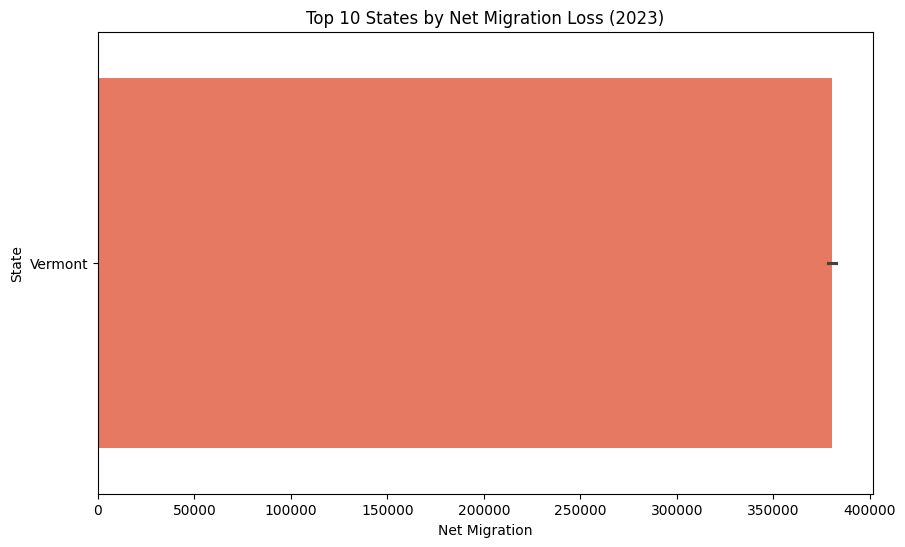

In [11]:
# Net Migration Losses
top_loss = migration.sort_values("Net Migration").head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_loss, y='State', x='Net Migration', palette='Reds_r')
plt.title('Top 10 States by Net Migration Loss (2023)')
plt.xlabel('Net Migration')
plt.ylabel('State')
plt.show()

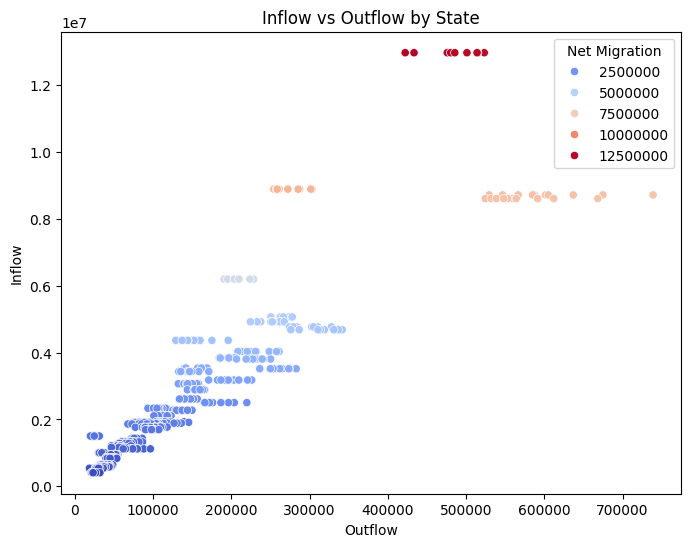

In [12]:
# Scatter Plot Inflow vs Outflow
plt.figure(figsize=(8, 6))
sns.scatterplot(data=migration, x='Total Outflow', y='Total Inflow', hue='Net Migration', palette='coolwarm')
plt.title('Inflow vs Outflow by State')
plt.xlabel('Outflow')
plt.ylabel('Inflow')
plt.show()

Now, I will Add a US Choropleth Map

In [13]:
# Mapping full state names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Add abbreviations to the migration DataFrame
migration['State Code'] = migration['State'].map(us_state_abbrev)


In [14]:
fig_map = px.choropleth(
    migration,
    locations='State Code',
    locationmode="USA-states",
    color='Net Migration',
    scope="usa",
    color_continuous_scale="Tealrose",
    title='Net Migration by State (2023)'
)
fig_map.show()


Map: Net Migration by U.S. State in 2023

This interactive map shows the net migration for each U.S. state in 2023. Net migration is the difference between the number of people who moved into a state and the number who moved out. States shown in darker colors had a higher net gain in population, while lighter or reddish states lost more residents than they gained.

From this map, we can clearly see that states like Florida, Texas, and Arizona had the most positive net migration—they attracted many new residents. On the other hand, states such as California, New York, and Illinois experienced net losses, meaning more people left those states than moved in.

This visual helps us understand how population shifts are affecting different parts of the country and supports the idea that people are moving toward more affordable or opportunity-rich areas. You can hover over each state to see its exact net migration value.

Interpretation and Analysis:

## Key Findings

- **Florida, Texas, and Arizona** had the highest net migration gains, attracting large numbers of new residents.
- **California, New York, and Illinois** experienced the biggest net migration losses, meaning more people left than moved in.
- Migration seems heavily influenced by factors like cost of living, taxes, climate, and job opportunities.
- High inflow states also often have high outflows, indicating general population movement activity.

These insights help us understand how people are reshaping the U.S. population landscape—and why some states are growing faster than others.


## Conclusion

The analysis of 2023 interstate migration shows clear trends: people are leaving expensive, densely populated states in favor of more affordable, sunnier regions. This migration reshapes state economies, housing markets, and political dynamics. Future analyses could explore the age or income of movers, or reasons for migration using survey data.

